# Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)

Por Juan Pablo Bernal Lafarga - A01742342

### 1. Crea un espacio dentro del repositorio de GitHub que creaste para el portafolio de implementación (por ejemplo, una carpeta para el módulo de ML con una subcarpeta para este entregable).

https://github.com/JPBL101203/TC3006C_A01742342/tree/main/Portafolio_Implementacion/Machine_Learning_Imp

### 2. Selecciona uno de los dos primeros 'Challenge' vistos en clase (Week01_Challenge.pdf o Week02_Challenge1.pdf) y programa un algoritmo que permita resolver el problema. Dicho algoritmo debe ser uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice), y no puedes usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado.

He seleccionado el Week02_Challenge1 que dice:

  - Adapte el código de la regresión lineal desarrollado en clase para que el modelo entrenado corresponda con una regresión logística. Posteriormente, implemente un clasificador que estime si un estudiante aprueba o no el curso:

        ‡ Considerando solamente la columna ‘Attendance’

        ‡ Considerando solamente la columna ‘Homework’

      † Calcule las métricas de desempeño. ¿Cuál es mejor? ¿Le ganan a la referencia?

### 3. Divide el set de datos del problema en dos subconjuntos, uno para entrenamiento y otro para prueba. Entrena tu modelo sobre el primer subconjunto, y por un mínimo de 100 iteraciones. Selecciona valores para la tasa de aprendizaje y para los parámetros iniciales, según tu criterio.

Dado que el problema plantea 2 variables independientes, se tendrán los siguientes subconjuntos de entrenamiento y prueba:

In [1]:
x_train = [80, 65, 95, 95, 85, 75] # Subconjunto de la variable independiente Attendance para entrenamiento
x_test = [90, 65] # Subconjunto de la variable independiente Attendance para prueba

x1_train = [75, 70, 85, 100, 65, 55] # Subconjunto de la variable independiente Homework para entrenamiento
x1_test = [90, 80] # Subconjunto de la variable independiente Homework para prueba

y_train = [1, 0, 1, 1, 0, 0] # Subconjunto de la variable dependiente Pass para entrenamiento
y_test = [1, 1] # Subconjunto de la variable dependiente Pass para prueba

Se optó por una distribución de 75%-25% para los subconjuntos de entrenamiento y prueba respectivamente, ya que solo se cuenta con 8 observaciones. De esta manera el entrenamiento de se lleva a cabo con 6 datos y la prueba para predecir los otros 2 datos.

In [2]:
a = 0.001 # Taza de aprendizaje
teta_x = [0.1, 0.1] # Parámetros iniciales para el modelo de regresión logística con la variable Attendance
teta_x1 = [0.1, 0.1] # Parámetros iniciales para el modelo de regresión logística con la variable Homework

Se seleccionó un valor muy común de taza de aprendizaje y parámetros iniciales con valor de 0.1. El valor inicial de los parámetros se decidió después de recibir errores por parte del código de regresión logística al obtener que el logaritmo del modelo no estaba definido, es decir, se tomaban valores como 0 o 1.

In [3]:
def accuracy(tp, tn, fp, fn):
	num = tp+tn
	den = tp+tn+fp+fn
	return num/den

def precision(tp, fp):
  num = tp
  den = tp+fp
  return num/den

def recall(tp, fn):
  num = tp
  den = tp+fn
  return num/den

def f1_score(precision, recall):
  num = 2*precision*recall
  den = precision+recall
  return num/den

def pn(y_test, y_pred):
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i in range(len(y_test)):
    if y_test[i] == y_pred[i] == 1:
      tp += 1
    elif y_test[i] == y_pred[i] == 0:
      tn += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
      fn += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
      fp += 1
  return tp, tn, fp, fn

En este bloque se definen funciones de las métricas de evaluación requeridas en el Challenge.

  - Accuracy: Es la proporción de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) sobre el total de predicciones realizadas.

  - Precision: Es la proporción de predicciones positivas correctas sobre todas las predicciones positivas hechas por el modelo.

  - Recall: Es la proporción de verdaderos positivos identificados correctamente sobre todos los ejemplos que son realmente positivos.

  - F1 Score: Es la media armónica de la precisión y la sensibilidad. Se utiliza cuando se busca un equilibrio entre precisión y sensibilidad, especialmente cuando hay un desbalance de clases.

In [4]:
import numpy as np
import math

def reg_log(x, y, teta, a, n): # Función de regresión logística
  hx = [0] * len(x) # Función de hipótesis
  res = [0] * len(x) # Lista que almacenará la diferencia entre la función de hipótesis evaluada en x_i y el dato de la variable y_i
  res1 = [0] * len(x) # Lista que almacenará la diferencia entre la función de hipótesis evaluada en x_i y el dato de la variable y_i, multiplicada por x_i
  for i in range(n):
    for j in range(len(x)):
      hx[j] = 1 / (1 + math.exp(-(teta[0]+teta[1]*x[j])))
      res[j] = hx[j] - y[j]
      res1[j] = res[j] * x[j]
    pro = sum(res)/len(res) # Promedio de la diferencia entre la función de hipótesis evaluada en x_i y el dato de la variable y_i
    pro1 = sum(res1)/len(res1) # Promedio de la diferencia entre la función de hipótesis evaluada en x_i y el dato de la variable y_i, multiplicada por x_i
    teta[0] = teta[0] - a*pro # Actualización del parámetro teta 0
    teta[1] = teta[1] - a*pro1 # Actualización del parámetro teta 1
  return teta

def log_loss(x, y, teta):
  hx = [0] * len(x)
  j0 = [0] * len(x) # Lista que almacenará el costo por observación
  for i in range(len(x)):
    hx[i] = 1 / (1 + math.exp(-(teta[0]+teta[1]*x[i])))
    j0[i] = y[i] * math.log(hx[i]) + (1 - y[i]) * math.log(1 - hx[i])
  cost = -np.mean(j0) # Valor de la función de costo
  return cost

def predict(x, teta):
  hx = [0] * len(x)
  for i in range(len(x)):
    hx[i] = round(1 / (1 + math.exp(-(teta[0]+teta[1]*x[i]))), 0)
  return hx

En el bloque superior se muestra una función que abarca la regresión logística con Gradiente Descendiente para poder minimizar la función de costo, también está la función de costo log-loss y una función para predicciones.

In [5]:
################### Regresión Logística para entrenamiento con la variable Attendace

teta_x = reg_log(x_train, y_train, teta_x, a, 100)
cost_x = log_loss(x_train, y_train, teta_x)
print("Los parámetros obtenidos después de 100 iteraciones son ", teta_x)
print("El log-loss obtenido después de 100 iteraciones es ", cost_x)

Los parámetros obtenidos después de 100 iteraciones son  [0.09429219813602557, 0.0010491077185701618]
El log-loss obtenido después de 100 iteraciones es  0.6933111554832868


In [6]:
################### Regresión Logística para entrenamiento con la variable Attendace

teta_x1 = reg_log(x1_train, y_train, teta_x1, a, 100)
cost_x1 = log_loss(x1_train, y_train,teta_x1)
print("Los parámetros obtenidos después de 100 iteraciones son ", teta_x1)
print("El log-loss obtenido después de 100 iteraciones es ", cost_x1)

Los parámetros obtenidos después de 100 iteraciones son  [0.0911209399771452, 0.0028622947780536797]
El log-loss obtenido después de 100 iteraciones es  0.6883021050899152


### 4. Prueba tu implementación. Para ello, utiliza el modelo entrenado para hacer predecir las salidas del subconjunto de prueba, y compara contra los datos reales en una gráfica.

In [7]:
predict(x_test, teta_x) # Predicción del conjunto de prueba del modelo Attendance

[1.0, 1.0]

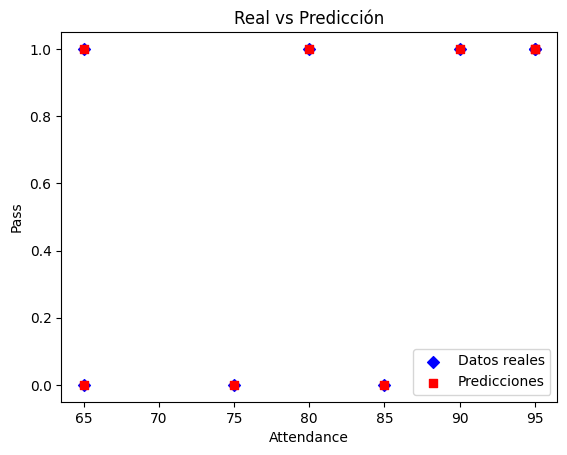

In [8]:
import matplotlib.pyplot as plt

# Crear la gráfica de comparación de puntos
plt.scatter(x_train + x_test, y_train + y_test, color='blue', marker='D', label='Datos reales')  # 'D' para rombos
plt.scatter(x_train + x_test, y_train + predict(x_test, teta_x), color='red', marker='s', label='Predicciones')   # 's' para cuadrados

# Añadir etiquetas y título
plt.xlabel('Attendance')
plt.ylabel('Pass')
plt.title('Real vs Predicción')
plt.legend()

# Mostrar la gráfica
plt.show()

In [9]:
predict(x1_test, teta_x1) # Predicción del conjunto de prueba del modelo Homework

[1.0, 1.0]

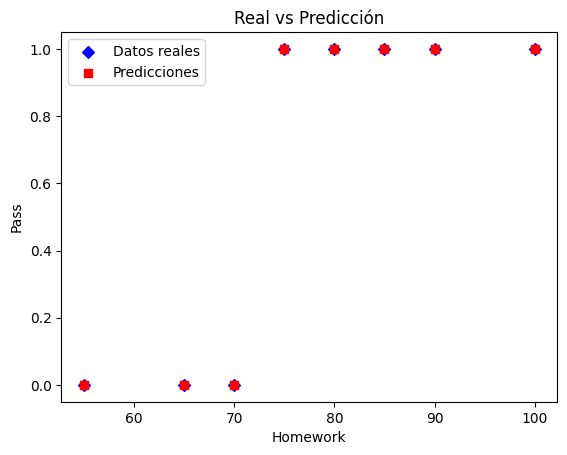

In [10]:
# Crear la gráfica de comparación de puntos
plt.scatter(x1_train + x1_test, y_train + y_test, color='blue', marker='D', label='Datos reales')  # 'D' para rombos
plt.scatter(x1_train + x1_test, y_train + predict(x1_test, teta_x1), color='red', marker='s', label='Predicciones')   # 's' para cuadrados

# Añadir etiquetas y título
plt.xlabel('Homework')
plt.ylabel('Pass')
plt.title('Real vs Predicción')
plt.legend()

# Mostrar la gráfica
plt.show()

### 5. Calcula el valor de la función de costo para el subconjunto de entrenamiento, y para el subconjunto de prueba.

In [11]:
print("Valor de la función de costo para los datos de entrenamiento del modelo Attendance ", log_loss(x_train, y_train, teta_x))
print("Valor de la función de costo para los datos de prueba del modelo Attendance ", log_loss(x_test, predict(x_test,teta_x), teta_x))

Valor de la función de costo para los datos de entrenamiento del modelo Attendance  0.6933111554832868
Valor de la función de costo para los datos de prueba del modelo Attendance  0.6092188814325136


In [12]:
print("Valor de la función de costo para los datos de entrenamiento del modelo Homework ", log_loss(x1_train, y_train, teta_x1))
print("Valor de la función de costo para los datos de prueba del modelo Homework ", log_loss(x1_test, predict(x1_test,teta_x1), teta_x1))

Valor de la función de costo para los datos de entrenamiento del modelo Homework  0.6883021050899152
Valor de la función de costo para los datos de prueba del modelo Homework  0.5398786809271406


Y además de la función de costo, se calcularán las métricas de matrices de confusión debido a instrucciones del problema.

In [13]:
tp, tn, fp, fn = pn(y_test, predict(x_test, teta_x))
print("Las métricas de evaluación del modelo Attendance dan: ")
print("Accuracy: ", accuracy(tp, tn, fp, fn))
print("Precision: ", precision(tp, fp))
print("Recall: ", recall(tp, fn))
print("F1 Score: ", f1_score(precision(tp, fp), recall(tp, fn)))

Las métricas de evaluación del modelo Attendance dan: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [14]:
tp1, tn1, fp1, fn1 = pn(y_test, predict(x1_test, teta_x1))
print("Las métricas de evaluación del modelo Attendance dan: ")
print("Accuracy: ", accuracy(tp1, tn1, fp1, fn1))
print("Precision: ", precision(tp1, fp1))
print("Recall: ", recall(tp1, fn1))
print("F1 Score: ", f1_score(precision(tp1, fp1), recall(tp1, fn1)))

Las métricas de evaluación del modelo Attendance dan: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


Como podemos apreciar, en ambos modelos las métricas de evaluación prueban que el modelo es exacto al 100%, las predicciones siempre son correctas. Esto se debe, más que nada, al tamaño de los datos, pues solo se contaron con 6 datos de entrenamiento y 2 de prueba. Estos pocos datos llevan a un gran overfitting.

### 6. Para facilitar la revisión, entrega dos archivos. El primero debe ser un Jupyter Notebook con todo el desarrollo (código comentado). El segundo debe ser un PDF del Jupyter Notebook. Para esto último, utiliza el comando nbconvert --to html para exportar el notebook a HTML y poder guardar el PDF más fácilmente (https://github.com/jupyter/nbconvert). Ten en cuenta que debes cargar tu directorio de Drive y dar la ruta al archivo, por lo que el comando completo sería:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/archivo.ipynb


In [16]:
#!apt-get -y install texlive-xetex
#!apt-get -y install texlive-fonts-recommended texlive-fonts-extra
!jupyter nbconvert --to html "/content/drive/MyDrive/ColabNotebooks/Implementacion.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/Implementacion.ipynb to html
[NbConvertApp] Writing 691652 bytes to /content/drive/MyDrive/ColabNotebooks/Implementacion.html


### 7. Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.